**Part I: Importing the Dataset**

In [12]:
import pandas as pd
import numpy as np

# Import the Iris data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
df_as_numpy = df.to_numpy()

# Choose petal width (4th column) and sepal width (2nd column) as features of the data
X = df_as_numpy[:, [3, 1]]

# Print the different class labels
Y = df_as_numpy[:, 4]

print("Class labels:", np.unique(Y))

Class labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


**Part II: Training the SVM**

In [13]:
# Split the dataset to training data and test with 30% test size and random state 3
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3) # Should this be stratified?

# Implement feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Train the Support Vector Machine (SVM) by fitting the train data set using the SVC class and fit method from the sklearn.svm with linear Kernel, parameter C=1.0, and random_state=3
from sklearn.svm import SVC
svmc = SVC(kernel = "linear", C = 1.0, random_state = 3)
svmc.fit(X_train_std, Y_train)

# from sklearn import svm
# clf = svm.SVC(kernel="linear", C=1).fit(X_train_std, Y_train) # We call our estimator instance clf, as it is a classifier
# clf.score(X_test, Y_test)

SVC(kernel='linear', random_state=3)

**Part III: Evaluate the SVM Model**

In [14]:
# Count the number of misclassified samples
Y_pred = svmc.predict(X_test_std)
print("Misclassified samples: %d" % (Y_test != Y_pred).sum())

# Print the accuracy of the SVM model
# print("Accuracy: %.2f" % svmc.score(X_test_std, Y_test))
from sklearn.metrics import accuracy_score 
print("Accuracy: %.2f" % accuracy_score(Y_test, Y_pred))

Misclassified samples: 3
Accuracy: 0.93


**Part IV: Plotting the Decision Regions and the Data**

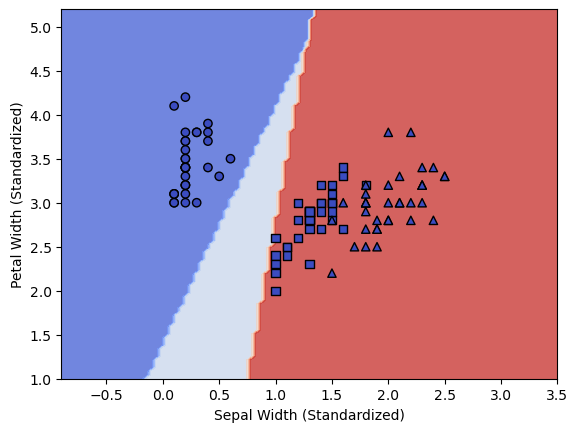

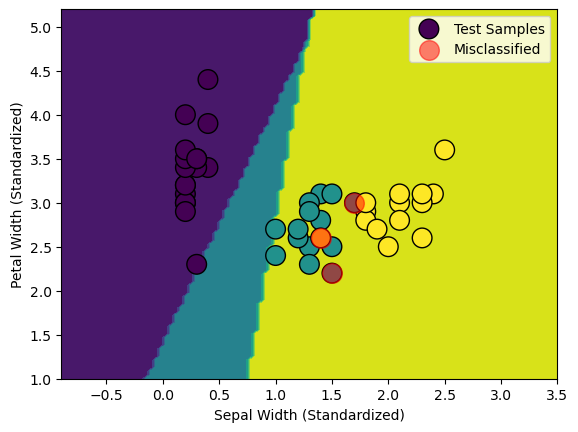

In [51]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Plot the decision regions
disp = DecisionBoundaryDisplay.from_estimator(
    svmc,
    X_train,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    xlabel="Sepal Width (Standardized)",
    ylabel="Petal Width (Standardized)",
)
# Convert class labels to numerical values for plotting
class_labels = np.unique(Y_train)
class_mapping = {label: idx for idx, label in enumerate(class_labels)}
colors_train = np.array([class_mapping[label] for label in Y_train])

# Plotting the data points with different colors and markers for each class
markers = ['o', 's', '^'] 
for i, class_label in enumerate(class_labels):
    class_indices = (Y_train == class_label)
    disp.ax_.scatter(
        X_train[class_indices, 0],
        X_train[class_indices, 1],
        c=[colors_train[j] for j in range(len(Y_train)) if class_indices[j]],
        edgecolor="k",
        cmap=plt.cm.coolwarm,
        label=f"Class {class_label}",
        marker=markers[i % len(markers)],
    )
disp.plot()

# Convert test labels to numerical values for plotting
colors_test = np.array([class_mapping[label] for label in Y_test])

# Highlight test samples
disp.ax_.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=colors_test,  # Use numerical values as colors
    edgecolor="k",
    s=200,
    marker="o",
    label="Test Samples",
)

# Convert misclassified labels to numerical values for plotting
colors_misclassified = np.array([class_mapping[label] for label in Y_test[Y_test != Y_pred]])

# Highlight misclassified samples in red
disp.ax_.scatter(
    misclassified[:, 0],
    misclassified[:, 1],
    c="red",
    s=200,
    marker="o",
    alpha=0.5,
    label="Misclassified",
)

# Add legend
disp.ax_.legend()

# Show the plot
plt.show()

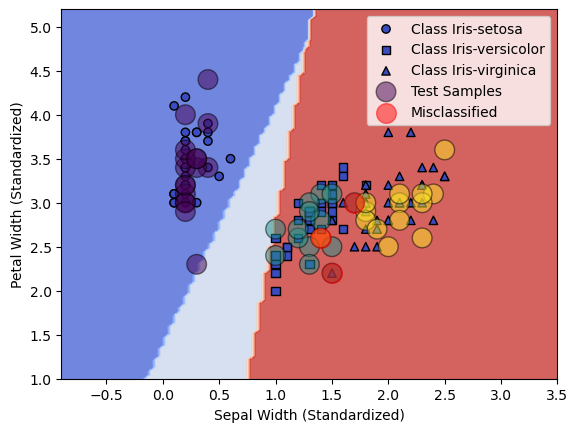

In [52]:
# Plot the decision regions and data points
disp = DecisionBoundaryDisplay.from_estimator(
    svmc,
    X_train,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    xlabel="Sepal Width (Standardized)",
    ylabel="Petal Width (Standardized)",
)

# Convert class labels to numerical values for plotting
class_labels = np.unique(Y_train)
class_mapping = {label: idx for idx, label in enumerate(class_labels)}
colors_train = np.array([class_mapping[label] for label in Y_train])

# Plotting the data points with different colors and markers for each class
markers = ['o', 's', '^'] 
for i, class_label in enumerate(class_labels):
    class_indices = (Y_train == class_label)
    disp.ax_.scatter(
        X_train[class_indices, 0],
        X_train[class_indices, 1],
        c=[colors_train[j] for j in range(len(Y_train)) if class_indices[j]],
        edgecolor="k",
        cmap=plt.cm.coolwarm,
        label=f"Class {class_label}",
        marker=markers[i % len(markers)],
    )

# Convert test labels to numerical values for plotting
colors_test = np.array([class_mapping[label] for label in Y_test])

# Highlight test samples
disp.ax_.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=colors_test,  # Use numerical values as colors
    edgecolor="k",
    s=200,
    marker="o",
    alpha=0.5,
    label="Test Samples",
)

# Highlight misclassified samples in red
disp.ax_.scatter(
    X_test[Y_test != Y_pred, 0],
    X_test[Y_test != Y_pred, 1],
    c="red",
    s=200,
    marker="o",
    alpha=0.5,
    label="Misclassified",
)

# Add legend
disp.ax_.legend()

# Show the plot
plt.show()